# Lab 7:  Running-average Filters

#### Goal: 
In today's lab we will use Python to illustrate the use of the running-average filter that we saw in the lectures. 
We will apply the running-average filter to:
1. smoothen an 1D signal to find a "trend"
2. remove oscilating distortions from an image
3. denoise an image

Finally, you will learn how to implement a 2D running-average filter and compare it to the (so-called) median filter.

## 1. Running Average Filter: Intro

In Lecture 12, we introduced the $M$-point running average (RA) filter as a dicrete-time system with the following input-output relation:
$$
y[n] = \frac{1}{M}\left(x[n] + x[n-1] + \ldots + x[n-(M-1)]\right)=\frac{1}{M}\sum_{\ell=0}^{M-1} x[n-\ell],~~~\forall n\in\mathbb{Z}
$$

In particular, this is the **causal** $M$-point running average filter (Why?). The **length** of the filter is $M$.

To better understand the functionality of the RA filter, let us compute the output $y[n]$ of the system for a particular input signal $x[n]$. 

Specifically, consider the signal $x[n]$ that we saw in Lecture 12.

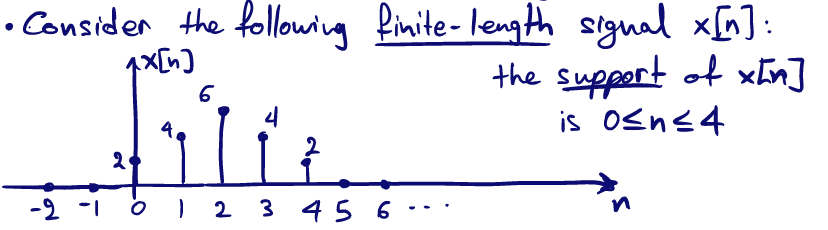

<font color='red'>**Exercise 1.1**</font> Compute the output of a 3-pt RA filter when $x[n]$ above is the input. We will walk you through this. So, follow the steps as indicated below.

In [1]:
## Import some necessary packages
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<font color='red'>**Exercise 1.1.1**</font> Initialize the following variables.

In [2]:
# length of input signal x[n]
N = 5

# lenth of 3-pt RA filter
M = 3

# length of the output signal y[n]
L = 5+3-1

<font color='red'>**Exercise 1.1.2**</font> Initialize two 1-D arrays of length $N$ and $L$ each to store the values of the input and output signals, respectively. For the input signal, you already know the values that it takes. For the output signals just set all entries to zero for now. We will compute the correct entries subsequently.

In [3]:
x = np.array((2,4,6,4,2))
y = np.zeros(L)

Let us now make a [stem plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html) of the input signal $x[n]$.

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


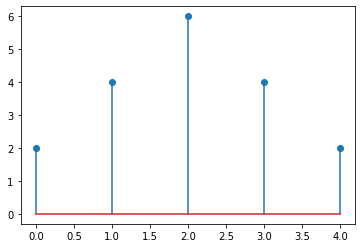

In [4]:
plt.stem( range(0,N) , x )
plt.show()

<font color='red'>**Exercise 1.1.3**</font> Write Python code that computes the output signal $y[n]$. Also, make a stem plot of the output signal.

In [5]:
y = np.zeros(L)
for n in range(L):                  # n=0,1,....,L-1
    for ell in range(M):            # ell=0,1,2
        if (n-ell>=0 and n-ell<=N-1): 
            y[n] = y[n] + x[n-ell]/3;

The code above has two for-loops. 

The outer loop runs over all time indices $n$ for which we want to compute the value of $y[n]$. 

The inner loop runs over an the index $\ell$ of the summation that defines the input-output relation of the 3-pt RA filter:
$$
y[n] = \frac{1}{3} \sum_{\ell=0}^{2} x[n-\ell]
$$

[0.66666667 2.         4.         4.66666667 4.         2.
 0.66666667]


C:\Python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


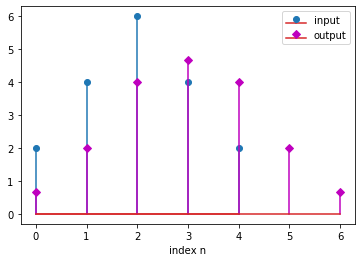

In [6]:
print(y)
plt.stem( range(0,N) , x )
plt.stem( range(0,L) , y , 'm' , markerfmt='mD')
plt.xlabel('index n')
plt.legend({'input','output'})
plt.show()

<font color='red'>**Exercise 1.1.5**</font> Why do we need the `if statement` in the code above? Run the cell below instead. Why does this fail?

something went wrong
something went wrong
something went wrong
[2.66666667 2.66666667 4.         4.66666667 4.         2.
 0.66666667]


C:\Python37-32\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
C:\Python37-32\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


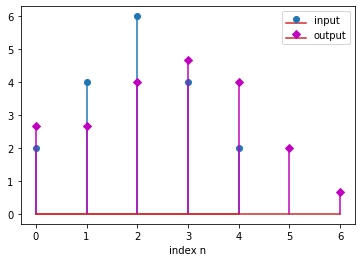

In python negative index is a thing, otherwise a simple try catch will do the trick, so in this case what instead of zeroes, the last fill element has been taken into account and the last few ones are actually outside the boundary of the original array, so it failed 


In [7]:
y = np.zeros(L)
for n in range(0,L):                  # n=0,1,....,L-1
    for ell in range(0,3):            # ell=0,1,2
        try:
            y[n] = y[n] + x[n-ell]/3;    
        except:
            print("something went wrong")
print(y)
plt.stem( range(0,N) , x )
plt.stem( range(0,L) , y , 'm' , markerfmt='mD')
plt.xlabel('index n')
plt.legend({'input','output'})
plt.show()
print("In python negative index is a thing, otherwise a simple try catch will do the trick, so in this case \
what instead of zeroes, the last fill element has been taken into account \
and the last few ones are actually outside the boundary of the original array, so it failed \
")

### 1.1 RA filter function

<font color='red'>**Exercise 1.2**</font> Write a Python function that takes as arguments an input signal x of length $N$ and the length $M$ of the filter, and computes the output $y$ (which has length L=N+M-1) of a causal $M$-point RA filter.

In [8]:
def causal_RA_Filter(x,M):
    # x: inptut signal 
    # M: order of RA filter
    
    N = len(x)         # length of input signal. 
    
    L = N + M -1          # length of output
    y = np.zeros(L)    # initialize output
    
    for i in range(0,L): 
        for j in range(0,M):
            if (i-j>=0 and i-j<N): 
                y[i] = y[i] + x[i-j]/M;
                
    return y

<font color='red'>**Exercise 1.3**</font> Test your function by calling it on the input signal x you created previously. Plot the output for RA filters of lengths 1, 2, 3, 4 and 5. Can you do this in a for-loop?

[2 4 6 4 2]


C:\Python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
C:\Python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


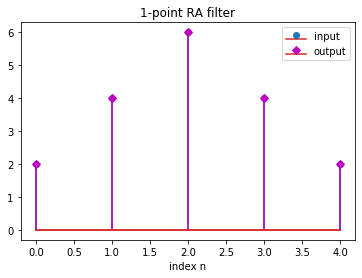

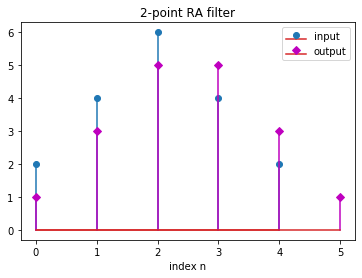

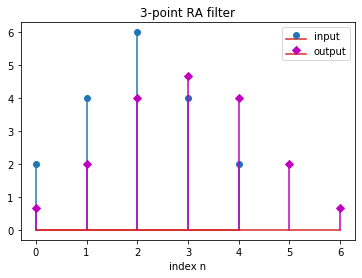

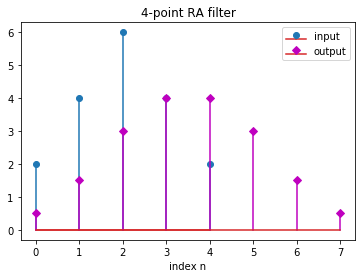

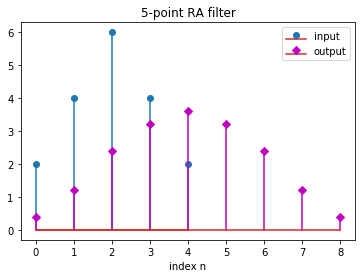

In [9]:
print(x)
for M in range(5) :
    a = M + 1
    plt.stem( range(0,N) , x )
    plt.stem( range(0,N+M) , causal_RA_Filter( x , a ) , 'm' , markerfmt='mD')
    plt.xlabel('index n')
    plt.title('%i-point RA filter' %(M+1))
    plt.legend({'input','output'})
    plt.show()

## 2. Illustration of RA filter: Smoothing

As we saw in the lectures, averaging is commonly used whenever data fluctuate and must be smoothed prior to interpretation. For instance, stock-market prices fluctuate noticeably from day-to-day. It is common to take an average of stock prices over several days before looking for any trend.

We will illustrate this idea below with a simple example. Specifically, we will apply the RA filter to get rid of an undesired varying component in a signal $x[n]$ that is defined as follows:

$$
x[n] = \begin{cases} 
\underbrace{(1.02)^n}_{z[n]} + \frac{1}{2}\cos\left(2\pi \frac{n}{8} + \frac{\pi}{4}\right) &,0\leq n\leq 40, \\
0 &,\text{otherwise.}
\end{cases}
$$

<font color='red'>**Exercise 2.1**</font> Plot the signal $x[n]$ above. Notice that the signal is composed of a slowly varying component $z[n]$ and an undesired sinusoid. In the same figure plot the slowly varying component $(1.02)^n$.

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
C:\Python37-32\lib\site-packages\ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


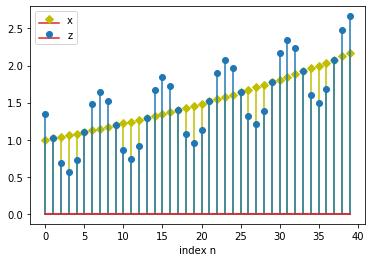

In [10]:
N = 40                     # signal length

# First create an array to store the signal values
x = np.zeros(N)          # Initialize an all-zeros array of proper size
for n in range(N):
    x[n] = 1.02 ** n + 0.5*np.cos(2*np.pi*n/8 + np.pi/4)

    
# Do the same for the slowly varying component $z$
z = np.zeros(N)            # Initialize an all-zeros array of proper size
for n in range(N):
    z[n] = 1.02 ** n

# Make stem plots of the two signals in the same figure 
plt.stem( range(0,N) , z ,  'y' , markerfmt='yD') 
plt.stem( range(0,N) , x )
plt.legend({'z','x'})
plt.xlabel('index n')
plt.show()

<font color='red'>**Exercise 2.2**</font> Compute and plot the output of an $M$-point RA filter when $x[n]$ is applied as its input, for values of M from 3 to 11. Use a for-loop and the code given to in Exercise 1.3 to do the plots.

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


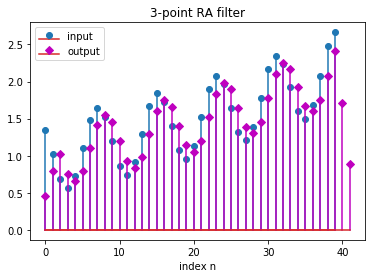

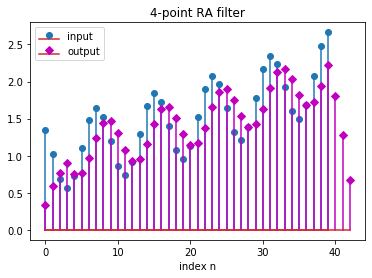

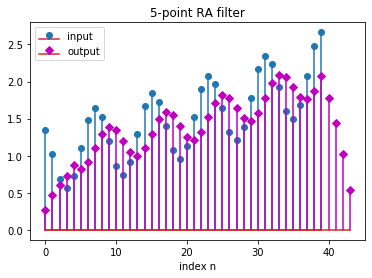

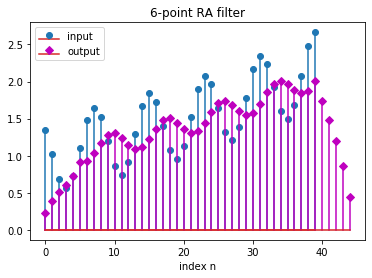

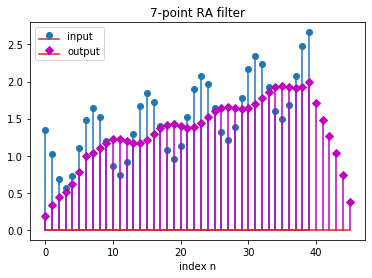

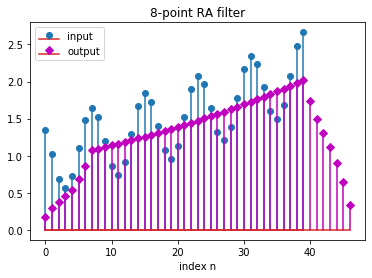

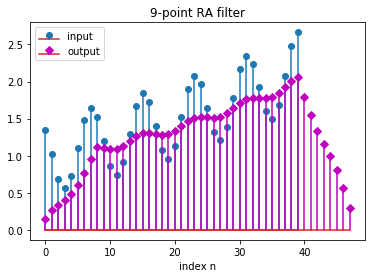

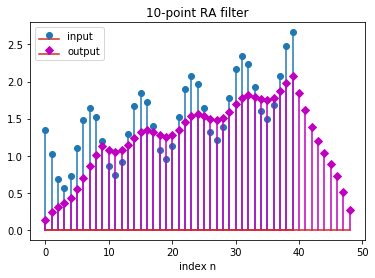

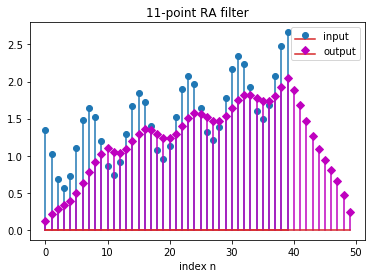

In [11]:
for M in range(3,12) :
    plt.stem( range(0,N) , x )
    plt.stem( range(0,N+M-1) , causal_RA_Filter( x , M ) , 'm' , markerfmt='mD')
    plt.xlabel('index n')
    plt.title('%i-point RA filter' %(M))
    plt.legend({'input','output'})
    plt.show()

<font color='red'>**Exercise 2.3**</font> Which of the above filters would you prefer using to smooth $x[n]$? In other words, which value of $M$ produces an output $y[n]$ that reveals the "trend" of the slowly varying component more accurately? 

For the value of M of your choice plot in the same figure, the signals $x[n]$, $y[n]$ and the slowly-varying component $z[n]$.

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly 

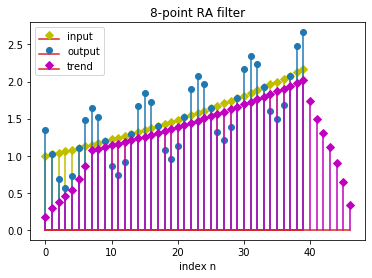

In [12]:
M = 8
plt.stem( range(0,N) , z ,  'y' , markerfmt='yD')
plt.stem( range(0,N) , x )
plt.stem( range(0,N+M-1) , causal_RA_Filter(x,M) , 'm' , markerfmt='mD')
plt.xlabel('index n')
plt.title('%i-point RA filter' %M)
plt.legend({'trend','input','output'})
plt.show()

## 3. Smoothing an image

Your cat from the previous lab has been distorted by one of your TAs and looks like this now!

<img src="distorted_cat_1.jpg">

The cat needs your help to get back to its original form.

In [13]:
# first import and show the image
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

distorted_cat_1 = mpimg.imread('distorted_cat_1.jpg') 
#plt.imshow(noisy_img,cmap='gray')

distorted_cat_1 = distorted_cat_1[:,:,1]
distorted_cat_1.shape

(512, 512)

<font color='red'>**Exercise 3.1**</font> Reconstruct the image of the cat using an M-point RA filter. Specifically, write a Python function that takes as inputs the image and the filter length $M$ and applies the filter to each one of the **rows** of the image. 

In [14]:
def image_smoothing_row(img_in,M):
    rows = img_in.shape[0]                 # number of rows of the input image
    cols = img_in.shape[1]                 # number of cols of the input image

    img_out = np.zeros((rows, cols + M-1))              # initialize a 2D array to store the reconstructed image
                                             # Pay attention on how many columns the new image must have!!!
    
    print(len(img_out[0,:]),rows)
    for i in range(rows):                # for every row apply the running average filter
        img_out[i,:] = causal_RA_Filter(img_in[i,:],M)
            
    return img_out

Apply your function and plot the reocnstructed image for $M=3$.

514 512


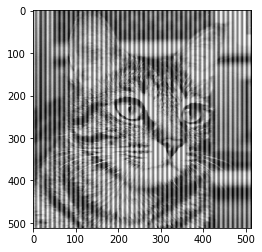

In [15]:
plt.imshow(image_smoothing_row(distorted_cat_1,3),cmap='gray')

<font color='red'>**Exercise 3.2**</font> Play with different values of $M$. Find the value of $M$ that gives the best reconstruction. Plot the output. Use a for-loop. Add titles to the images. indicating the length of the filter used

(This might take a while to run. We are using a lot of nested for-loops here.)

514 512


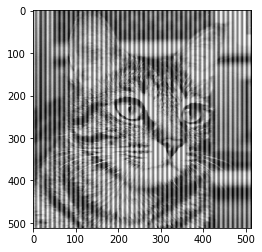

517 512


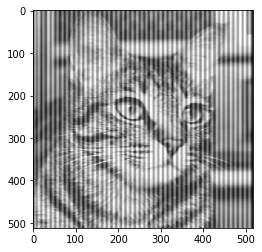

520 512


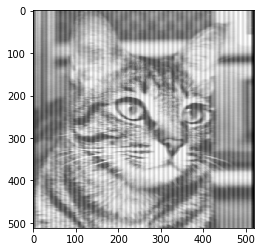

523 512


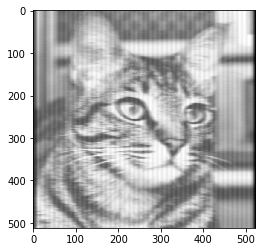

526 512


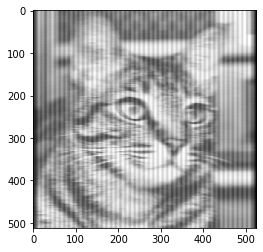

In [16]:
for i in range (1,6): 
    plt.imshow(image_smoothing_row(distorted_cat_1,3*i),cmap='gray')
    plt.show()

## 4. Image Denoising

You helped the cat, but somehow it has managed to get involved in another horrible accident with some salt and pepper shakers. Your cat looks like this now: 

<img src="noisy_cat.jpg"/>

The goal is again to restore your cat to its original good looks.

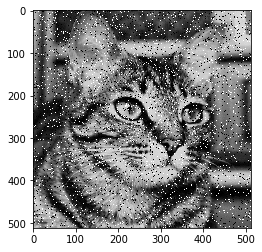

In [17]:
# first import and show the image
noisy_img = mpimg.imread('noisy_cat.jpg') 
plt.imshow(noisy_img,cmap='gray')

### 1-D RA filter

<font color='red'>**Exercise 4.1**</font> Reconstruct the image of the cat by applying an M-point RA filter at each one of the **rows** of the image. Plot the outputs for M=range(4,15). Find the best reconstruction

515 512


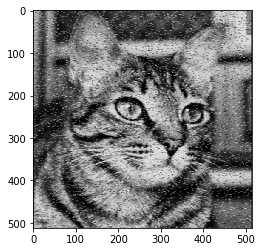

516 512


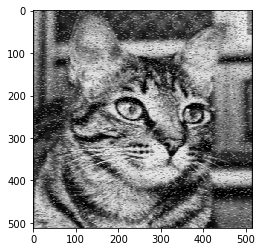

517 512


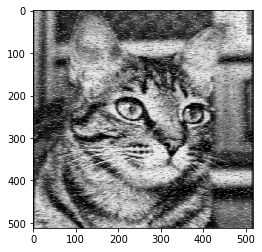

518 512


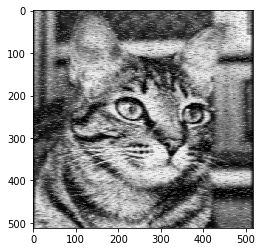

519 512


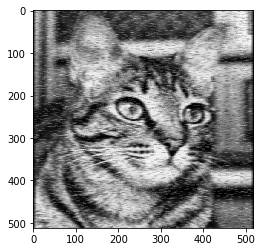

520 512


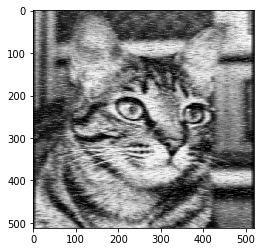

521 512


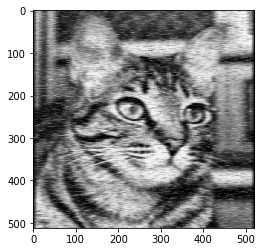

522 512


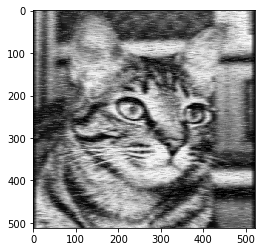

523 512


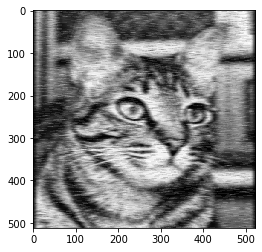

524 512


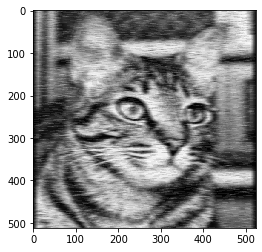

525 512


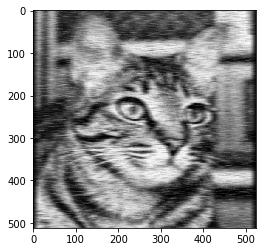

In [18]:
for i in range (4,15): 
    plt.imshow(image_smoothing_row(noisy_img,i),cmap='gray')
    plt.show()

Plot the best reconstruction

521 512


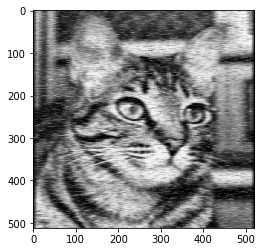

In [19]:
plt.imshow(image_smoothing_row(noisy_img,10),cmap='gray')

### 2D filter

Remember that the image is a 2D signal. Until now, we have been treating each row of the image as an independent 1D signal and applied the 1D RA filter to it.

We might hope that by treating the image as a 2D signal we can achieve better reconstruction results. For example, we can now apply a **2D running-average filter** that averages neighboring pixel value across both rows and columns.

In fact, we will experiment with two ways of restoring your cat using 2D filters. 

**2D running-average filter:** One way is to set each pixel to be the *average value* of its surrounding pixels. 

**2D medial filter:** Another possible way is to set each pixel to be the *median value* of its surrounding pixels. This filter is non-linear, in contrast to the RA filter.

<font color='red'>**Exercise 4.2**</font> Write a function that returns two versions of the original image: 
one with an RA filter applied, and one with a median filter applied.

In [20]:
# The two arguments are the image to be filtered,
# and how many pixels in each direction to use for filtering
def mean_and_median_val_filt(img, n_avg_max):

    # First create two new arrays that have the same size as the original image
    n_rows, n_cols = img.shape[0], img.shape[1]
    
    img_mean_filtered = np.zeros((n_rows,n_cols))
    img_median_filtered = np.zeros((n_rows,n_cols))
    
    # Now loop through every pixel in the new image and determine what should be there
    for i in range(n_rows):
        for j in range(n_cols):
            
            # How many pixels should we use in the x-direction and y-direction?
            # Keep in mind the edges of the image.
            n_avg_x = 2 * n_avg_max + 1
            n_avg_y = 2 * n_avg_max + 1
            
            # Take the submatrix that uses that many pixels in each direction #use another for loop
            submatrix = np.zeros((n_avg_x, n_avg_y))
            for k in range(n_avg_x):
                for l in range(n_avg_y):
                    if(j-n_avg_max + k >=0 and i-n_avg_max+l>=0 and j-n_avg_max + k< n_rows and i-n_avg_max+l<n_cols):
                        submatrix[k,l] = img[j-n_avg_max + k, i-n_avg_max+l]
                    else:
                        submatrix[k,l] = 0
            
            # Use numpy functions to find the mean and median of the submatrix
            mean = np.mean(submatrix)
            median = np.median(submatrix)
            
            # Now put those values in the proper places in the output matrices
            img_mean_filtered[j,i] = mean
            img_median_filtered[j,i] = median 
        
    return img_mean_filtered, img_median_filtered

<font color='red'>**Exercise 4.3**</font> Now use this function to denoise our beloved cat! Compare the results of the two methods. Find a number of pixels for averaging that looks good.

In [21]:
img_mean_filt, img_med_filt = mean_and_median_val_filt(noisy_img, 3)

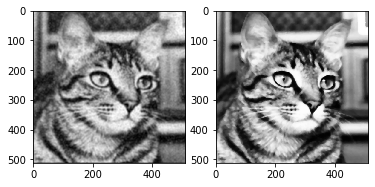

In [22]:
fig=plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img_mean_filt, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(img_med_filt, cmap='gray')
plt.show()

In [23]:
print("The second one, image appears to be sharper")

The second one, image appears to be sharper


Which do you like better? Why?